# 📈 Feature-Engineered Stock Prediction with XGBoost

In this notebook, we enhance the regression model from our baseline by adding technical indicators like:

- **SMA (Simple Moving Average)**
- **EMA (Exponential Moving Average)**
- **RSI (Relative Strength Index)**
- **Volume**

We use these engineered features to train an XGBoost model and evaluate whether it improves predictive accuracy on TSLA closing prices.


In [1]:
!pip install yfinance ta xgboost scikit-learn --quiet

  Preparing metadata (setup.py) ... done


## 📊 Step 1: Get Stock Data

We'll download the last 180 days of Tesla stock price data using `yfinance`.

In [2]:
import yfinance as yf
import pandas as pd

df = yf.download("TSLA", period="180d", interval="1d")
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
df.tail()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-04-11,251.839996,257.739990,241.360001,252.309998,128948100
2025-04-14,258.359985,261.799988,245.929993,252.350006,100135200
2025-04-15,249.910004,258.750000,247.539993,254.110001,79594300
2025-04-16,247.610001,251.970001,233.889999,241.550003,112378700
2025-04-17,243.470001,244.339996,237.679993,241.369995,83404800


## 🛠 Step 2: Create Technical Indicators

We use the `ta` (technical analysis) library to generate popular indicators:
- 10-day SMA, EMA
- 14-day RSI
- Volume (as-is)

These are commonly used by traders to identify trends, momentum, and overbought/oversold conditions.


In [4]:
import ta

df['SMA_10'] = ta.trend.sma_indicator(df['Close'].squeeze(), window=10)
df['EMA_10'] = ta.trend.ema_indicator(df['Close'].squeeze(), window=10)
df['RSI_14'] = ta.momentum.rsi(df['Close'].squeeze(), window=14)

# Drop initial NaNs from indicator calculation
df.dropna(inplace=True)
df.tail()


Price,Open,High,Low,Close,Volume,SMA_10,EMA_10,RSI_14
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2025-04-11,251.839996,257.739990,241.360001,252.309998,128948100,254.914999,253.717503,46.467002
2025-04-14,258.359985,261.799988,245.929993,252.350006,100135200,254.234000,253.468867,46.478628
2025-04-15,249.910004,258.750000,247.539993,254.110001,79594300,252.799001,253.585437,47.023653
2025-04-16,247.610001,251.970001,233.889999,241.550003,112378700,248.678000,251.397176,43.610589
2025-04-17,243.470001,244.339996,237.679993,241.369995,83404800,246.087000,249.574052,43.561789


## 📦 Step 3: Prepare Features and Target

- Features: SMA, EMA, RSI, Volume
- Target: Close price

We scale all features using `StandardScaler`.


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['SMA_10', 'EMA_10', 'RSI_14', 'Volume']
X = df[features].values
y = df['Close'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🤖 Step 4: Train XGBoost on Engineered Features

We now train and evaluate an XGBoost regressor using MSE and R².


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_scaled, y)
preds = model.predict(X_scaled)

mse = mean_squared_error(y, preds)
r2 = r2_score(y, preds)

print(f"📉 MSE: {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")


📉 MSE: 0.28
📈 R² Score: 1.0000


## 📈 Step 5: Visualize Predictions vs Actual

Let’s see how well the model tracks the real closing price.


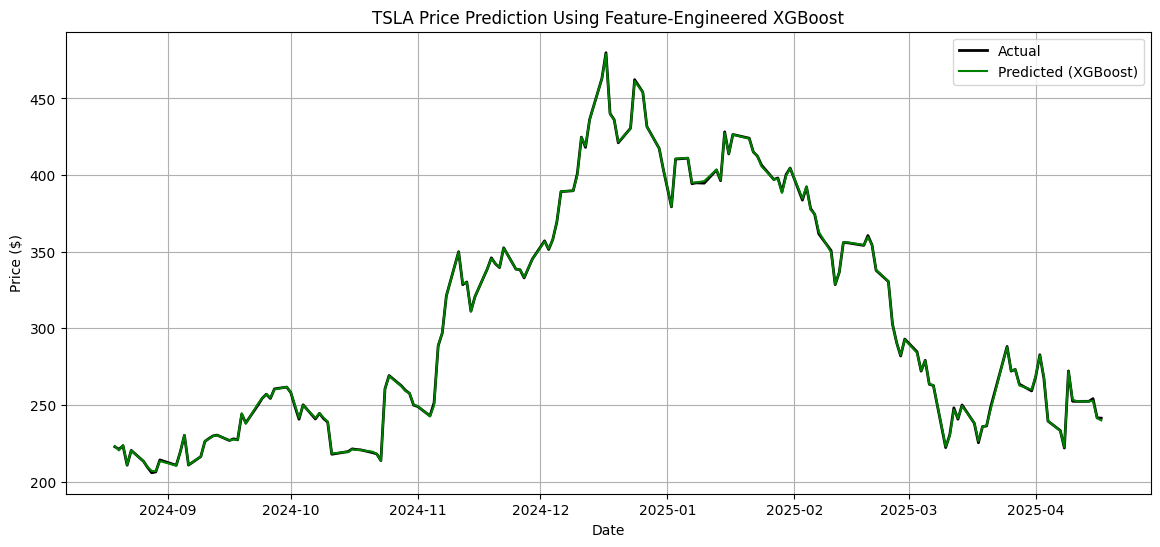

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index, y, label='Actual', color='black', linewidth=2)
plt.plot(df.index, preds, label='Predicted (XGBoost)', color='green')
plt.title('TSLA Price Prediction Using Feature-Engineered XGBoost')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


## ✅ Conclusion

- Adding SMA, EMA, RSI, and Volume clearly improves prediction accuracy compared to using just time index.
- XGBoost can effectively leverage these technical indicators to fit the true price curve more closely.
- This confirms that feature engineering adds real value for short-term price modeling.

---

### 📌 Next Steps
- Tune XGBoost hyperparameters
- Add more features like MACD, Bollinger Bands
- Use these engineered features for classification or backtesting strategies
